### **Medical Object Detection**
Our group developed a model that is able to detect melanoma, a serious type of skin cancer.

This type of cancer can be easily confused with skin discoloration, so being able to notice what is skin cancer and benign skin discoloration is extremely important.

Team Members: Kevin Chen, Alexander Chu, Rohan Cowlagi, Meghana Karumuri

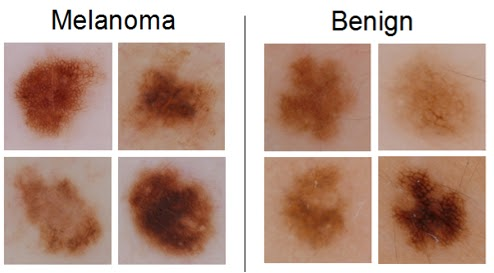

> As seen in the above images, melanoma can be extremely difficult to detect just based off of the human eye, so machine learning can provide an essential tool to help detect a life-threatening disease.





#There are 2 processes that need to run before the model is trained

## **The Data Generator**


*   Generates data from the dataset to feed to the model
* Makes it possible to handle large amounts of data
* We use an Image Data Generator which allows us to augment and prepare images for image classification in the model

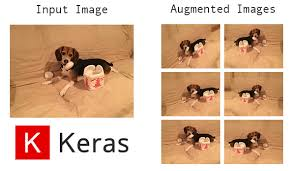


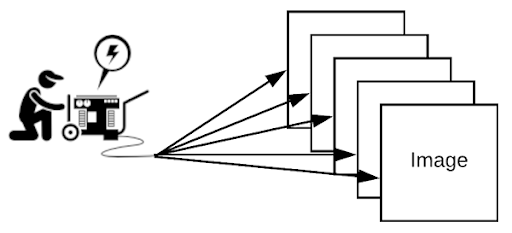


Input Pipeline
* Parallel prefetching and preprocessing images in batches
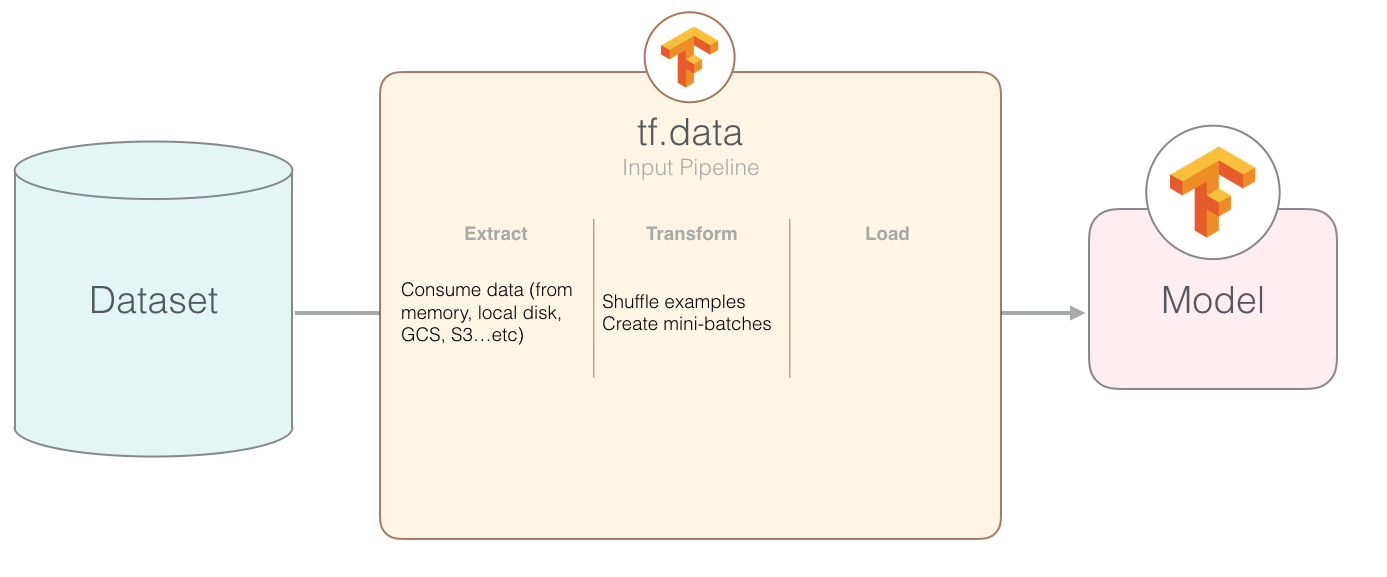

#In order to run the interactive element, please make sure to FIRST run the block of code below

In [ ]:
# Convolutional Neural Network
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.optimizers import RMSprop
import os.path
from os import path
import matplotlib.pyplot as plt
import tensorflow as tf
import PIL
from PIL import Image
import numpy as np
print("Downloading pretrained model:")
!gdown --id 1-yatFvHQokK7fHaaaAMO2TkvlgkUnXhw

#Layers and Output
visible = Input(shape=(500, 500,3))
conv1 = Conv2D(32, kernel_size=4, activation='relu')(visible)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(16, kernel_size=4, activation='relu')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
flat = Flatten()(pool2)
hidden1 = Dense(10, activation='relu')(flat)
output = Dense(1, activation='sigmoid')(hidden1)
model = Model(inputs=visible, outputs=output)

model.compile(
    optimizer=RMSprop(),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=["accuracy"],
)
model.load_weights("/content/model.h5")
print("Done!")

Downloading...
From: https://drive.google.com/uc?id=1-yatFvHQokK7fHaaaAMO2TkvlgkUnXhw
To: /content/model.h5
9.59MB [00:00, 15.6MB/s]
Done!


#Below is a script that will allow you to see the model being run on this specific image.

#The model will predict whether this image is malignant, meaning it has melanoma, or benign, meaning no melanoma.

Downloading...
From: https://drive.google.com/uc?id=1L5TMRMn78eTn7Z1joS2vfCCtadCKG4Mu
To: /content/ISIC_0010860.jpg
100% 190k/190k [00:00<00:00, 69.9MB/s]


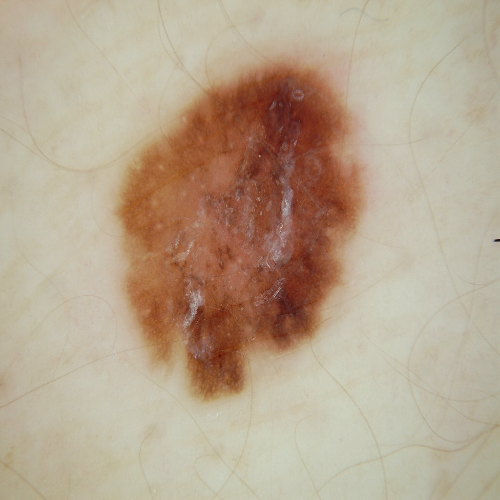

benign


In [ ]:
import cv2
from google.colab.patches import cv2_imshow
!gdown --id 1L5TMRMn78eTn7Z1joS2vfCCtadCKG4Mu

classes = ['benign', 'malignant']

img_array = cv2.imread("/content/ISIC_0010860.jpg")

new_array = cv2.resize(img_array, (500, 500))
cv2_imshow(new_array)

new_array = np.reshape(new_array, (1, 500, 500, 3,))
prediction = model.predict([new_array])
print(classes[np.argmax(prediction)])